In [13]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis.analysis.msd as msd

u = mda.Universe('step5_5.gro', 'unwrapped.xtc')


100%|██████████| 10/10 [00:00<00:00, 43329.59it/s]


MSD Water Oxygens: [   0.          345.70324398  694.76569646 1042.46108375 1390.25678192
 1735.91251005 2087.2926506  2440.45368992 2792.58385609 3135.94783634
 3468.79038897]
MSD Sodium: [   0.          156.30621018  306.27777302  458.24007428  563.19136161
  595.66121861  723.84393918  784.34665781  943.03413641 1175.526683
 1430.15667118]
MSD Oxygen: [nan nan nan nan nan nan nan nan nan nan nan]


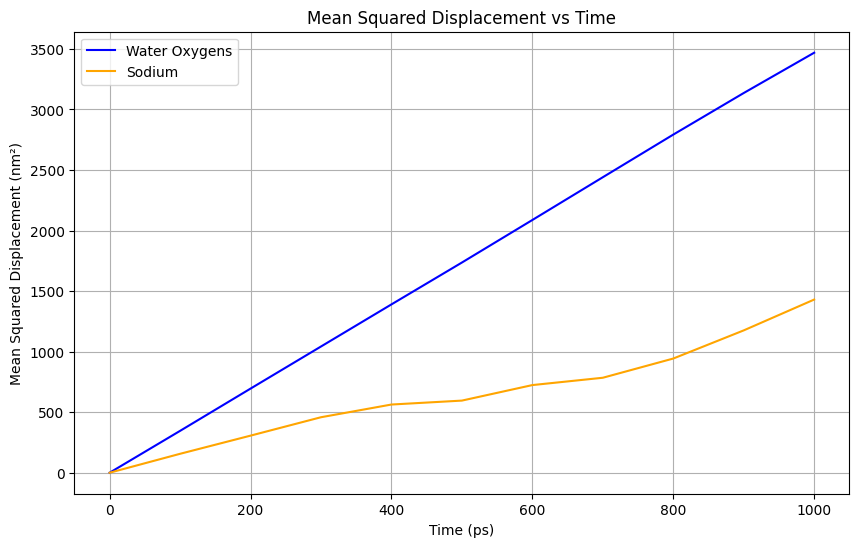

In [14]:
water_oxygens = 'resname TIP3 and name OH2'
sodium = 'resname SOD'
oxygen = 'resname O2'  

# Compute MSD for water oxygens
MSD_water = msd.EinsteinMSD(u, select=water_oxygens, msd_type='xyz', fft=False)
MSD_water.run()
msd_water = MSD_water.results.timeseries

# Compute MSD for sodium
MSD_sodium = msd.EinsteinMSD(u, select=sodium, msd_type='xyz', fft=False)
MSD_sodium.run()
msd_sodium = MSD_sodium.results.timeseries

# Compute MSD for oxygen 
MSD_oxygen = msd.EinsteinMSD(u, select=oxygen, msd_type='xyz', fft=False)
MSD_oxygen.run()
msd_oxygen = MSD_oxygen.results.timeseries

print("MSD Water Oxygens:", msd_water)
print("MSD Sodium:", msd_sodium)
print("MSD Oxygen:", msd_oxygen)

timestep = u.trajectory.dt  
lagtimes_water = np.arange(MSD_water.n_frames) * timestep
lagtimes_sodium = np.arange(MSD_sodium.n_frames) * timestep
lagtimes_oxygen = np.arange(MSD_oxygen.n_frames) * timestep

plt.figure(figsize=(10, 6))

# Plot MSD for water oxygens
plt.plot(lagtimes_water, msd_water, label='Water Oxygens', color='blue')

# Plot MSD for sodium
plt.plot(lagtimes_sodium, msd_sodium, label='Sodium', color='orange')

# Plot MSD for oxygen 
if np.any(~np.isnan(msd_oxygen)):
    plt.plot(lagtimes_oxygen, msd_oxygen, label='Oxygen', color='green')

plt.xlabel('Time (ps)')
plt.ylabel('Mean Squared Displacement (nm²)')
plt.title('Mean Squared Displacement vs Time')
plt.legend()
plt.grid()

plt.savefig('msd_plot.png')
plt.show()
